<img src="./pics/DL.png" width=110 align="left" style="margin-right: 10px">

# Introduction to Deep Learning

## 10. Home Assignment II.

---

## B) Fashion MNIST

<img src="./pics/exercises/fashion.gif" width=400>

Build a convolutional network to classify the fashion mnist dataset. Build a function which will predict the class for an image. The function will get a path of an image as a parameter, it reads the image then returns the predicted class. You can assume that the path will always contain an image, which has *28 x 28 x 4* dimensions.

The dataset is available in [keras](https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles). An example image is available at `data/fashion/test.png`.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import adam
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping

from numpy.random import seed

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
# set random seeds for reproducibility
tf.random.set_seed(42)
seed(42)

In [4]:
# download dataset and rescale to 0-1
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_train[0])

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.   

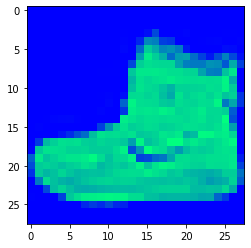

In [6]:
# sample image
plt.imshow(x_train[0], cmap=plt.get_cmap('winter'))

In [8]:
input_shape = (28, 28, 1)

print(y_train.shape)
print(input_shape)

(60000,)
(28, 28, 1)


In [9]:
# Initialize model
output_dim = 10

inp = Input(shape=input_shape)
queue = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(inp)
queue = Conv2D(filters=64, kernel_size=(4, 4), activation='relu')(queue)
queue = MaxPool2D(pool_size=(2, 2))(queue)
queue = Dropout(0.3)(queue)
queue = Flatten()(queue)
queue = Dense(units=128, activation='relu')(queue)
queue = Dropout(0.2)(queue)
queue = Dense(units=output_dim, activation='softmax')(queue)
model = Model(inputs=inp, outputs=queue)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 64)        32832     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               991360

In [10]:
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [11]:
history = model.fit(x_train, y_train,
          batch_size=100,
          epochs=80,
          callbacks=[EarlyStopping(monitor='loss', patience=15, verbose=1, mode='min')])

Epoch 1/80
600/600 [==============================] - 138s 230ms/step - loss: 0.4569 - accuracy: 0.8373
Epoch 2/80
600/600 [==============================] - 153s 255ms/step - loss: 0.2977 - accuracy: 0.8920
Epoch 3/80
600/600 [==============================] - 141s 234ms/step - loss: 0.2490 - accuracy: 0.9077
Epoch 4/80
600/600 [==============================] - 149s 249ms/step - loss: 0.2150 - accuracy: 0.9208
Epoch 5/80
600/600 [==============================] - 149s 248ms/step - loss: 0.1920 - accuracy: 0.9278
Epoch 6/80
600/600 [==============================] - 152s 253ms/step - loss: 0.1681 - accuracy: 0.9377
Epoch 7/80
600/600 [==============================] - 153s 255ms/step - loss: 0.1492 - accuracy: 0.9437
Epoch 8/80
600/600 [==============================] - 155s 258ms/step - loss: 0.1339 - accuracy: 0.9505
Epoch 9/80
600/600 [==============================] - 155s 258ms/step - loss: 0.1184 - accuracy: 0.9550
Epoch 10/80
600/600 [==============================] - 164s 274m

600/600 [==============================] - 162s 270ms/step - loss: 0.0193 - accuracy: 0.9934
Epoch 80/80
600/600 [==============================] - 156s 261ms/step - loss: 0.0218 - accuracy: 0.9927


In [12]:
final_loss, final_accuracy = model.evaluate(x_test, y_test)
print(f'The model final accuracy on test set is {final_accuracy:.2%}')

313/313 [==============================] - 6s 18ms/step - loss: 0.4801 - accuracy: 0.9274
The model final accuracy on test set is 92.74%


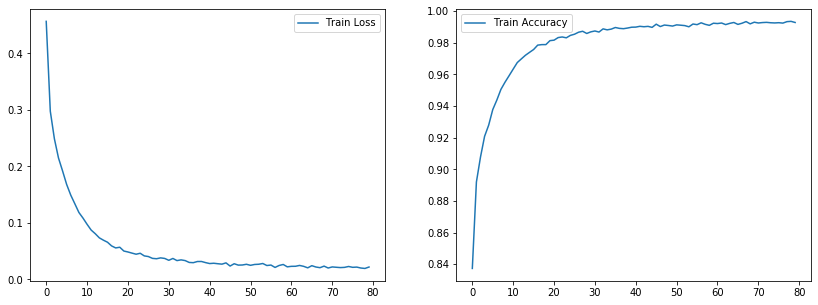

In [15]:
# visualize execution
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
ax1.plot(history.history['loss'], label='Train Loss')
ax1.legend()
ax2.plot(history.history['accuracy'], label='Train Accuracy')
ax2.legend()

In [16]:
# serialize model to JSON
model_json = model.to_json()
with open("mnist_fashion_cnn.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("mnist_fashion_cnn.h5")
print("Saved model to disk")

Saved model to disk


In [2]:
["T-shirt/top", "Trouser",
                      "Pullover", "Dress", "Coat",
                      "Sandal", "Shirt", "Sneaker",
                      "Bag", "Ankle boot"][3]

'Dress'